In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(0)

In [2]:
import tensorflow_probability.substrates.jax as tfp
import flax.linen as nn
import jax
import jax.numpy as jnp
import optax
from functools import partial
import seaborn as sns
import tensorflow as tf

dist = tfp.distributions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from dataloader import *
from retrain_fun import *
import datetime
import scipy.stats as st
import random
random.seed(0)
np.random.seed(0)
jax.random.PRNGKey(0)
os.environ["XLA_FLAGS"] = "--xla_gpu_deterministic_reductions --xla_gpu_autotune_level=2"
os.environ['TF_CUDNN_DETERMINISTIC']='1'


2023-07-30 23:44:17.178075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_aggregated, houses = data_preprocess(only_positive=True)

In [4]:
train_list= [[2361, 7719, 9019, 2335, 7951]]
test_list= [[4373, 7901, 3456, 3538, 2818]]
pool_list=[]
for i in range(len(train_list)):
    pool = [j for j in houses if j not in train_list[i]+test_list[i]]
    pool_list.append(pool)

In [5]:
data_aggregated

,clotheswasher1,dishwasher1,air1,refrigerator1,furnace1,dataid,localminute,aggr
2407,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:00:00-06,0.132
2408,0.000,0.001,0.004,0.120,0.006,3538,2018-01-01 00:01:00-06,0.131
2409,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:02:00-06,0.132
2410,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:03:00-06,0.132
2411,0.000,0.001,0.005,0.119,0.006,3538,2018-01-01 00:04:00-06,0.131
...,...,...,...,...,...,...,...,...
13100534,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:26:00-06,0.010
13100535,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:27:00-06,0.010
13100536,0.002,0.001,0.000,0.011,0.003,7951,2018-02-07 15:28:00-06,0.017
13100537,0.002,0.000,0.000,0.004,0.003,7951,2018-02-07 15:29:00-06,0.009


In [6]:
pool_list

[[5746, 8565, 9278, 8156, 8386, 9160, 661, 1642, 7536, 7800]]

In [7]:
len(pool_list[0])

10

Train Set No: 1
Iteration No:  0


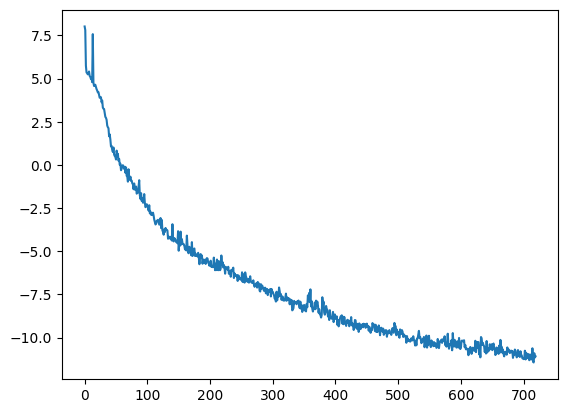

RMSE : [838.97186   65.4115   283.74158   52.868984 462.44693 ] MAE  : [328.1383    41.170593 121.62969   22.690022 248.00345 ] NLL : 6362.65625
[array([13.50549272, 17.89925847, 36.43992551, 30.85964816, 56.3204859 ]), array([10.11946451, 25.9236179 , 88.39056295, 84.92569243, 42.62619178]), array([ 60.41320099,  36.37737317, 111.91224084,  81.07524522,
       199.90964971]), array([14.99787805, 19.03588716, 41.47758081, 33.36189121, 50.18485849]), array([2.04060018, 9.19154596, 5.77045856, 3.50101264, 5.78648707]), array([1.62504228, 8.17905322, 4.46117458, 2.77609852, 4.68670433]), array([ 7.49740331, 13.77962133, 12.02146182,  6.87748465, 16.79404475]), array([37.15600451, 35.41283882, 78.05300371, 59.77050487, 99.7470048 ]), array([15.46794499, 16.07816083, 24.73027385, 14.03264226, 41.28900536]), array([ 3.33995439, 10.84165522, 10.3368515 ,  7.61925791, 11.1309125 ])]
[ 6.  5. 10.  7.  2.  1.  4.  9.  8.  3.]
Iteration No:  1


/home/dhruv.patel/multiout_tech/round_robin/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278]


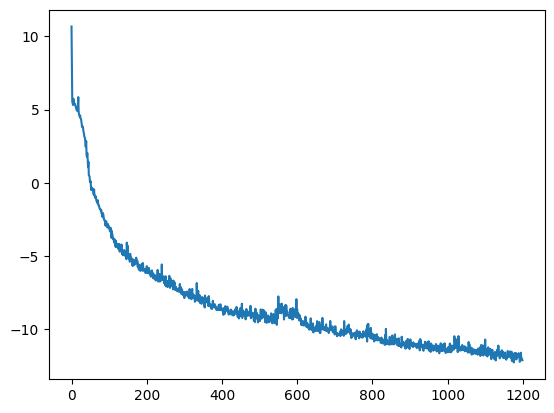

RMSE : [651.47064   63.11932  118.34574  112.265045 320.69913 ] MAE  : [259.63498   40.192894  62.075867  44.703426 154.19086 ] NLL : 5.195313930511475
[array([31.60172198, 18.25971537, 46.19723879, 46.91224253, 89.82038996]), array([ 5.43826111, 23.66719783, 40.6283219 , 40.00355995, 37.2441975 ]), array([26.48994652, 13.31352325, 27.64794165, 23.14174392, 43.21648011]), array([2.01919248, 7.37540321, 4.74948311, 2.56795077, 3.29847878]), array([34.01963068, 12.23443993, 33.14018621, 27.11033471, 54.57408872]), array([ 7.2363536 , 10.7665902 ,  9.33551588,  5.42506781,  9.45266886]), array([24.0599978 , 19.90460896, 36.62474473, 32.66335605, 41.55688066]), array([27.5405549 , 11.08163517, 25.55802111, 14.04268553, 34.71459189]), array([ 7.96624471, 11.26877713, 15.0454822 , 15.35053229, 21.62151898])]
[7. 9. 6. 1. 5. 2. 8. 3. 4.]
Iteration No:  2


/home/dhruv.patel/multiout_tech/round_robin/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565]


2023-07-30 23:53:06.331373: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[118349,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[118349,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-30 23:53:07.242694: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[118349,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[118349,50,99]{2,1,0}, f32[50,50,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


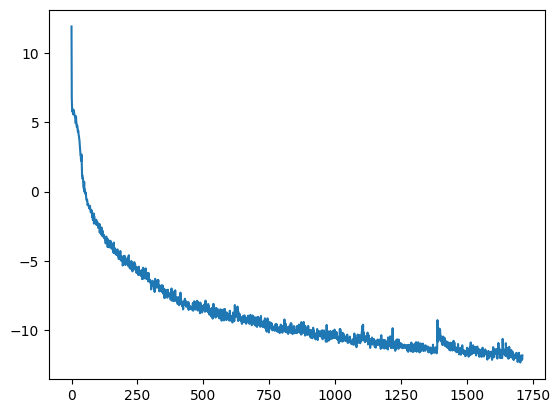

RMSE : [313.41553   58.654972  91.03152   31.602877 143.7694  ] MAE  : [117.99816   35.993095  49.520485  10.611089  54.066265] NLL : 4.531473159790039
[array([76.73126392, 19.85367613, 41.65594474, 39.1303852 , 62.79377176]), array([88.92040882, 19.29317154, 30.17125923, 21.69838063, 37.86650691]), array([2.63511109, 6.90013301, 4.48372832, 3.1153132 , 4.2035678 ]), array([74.37900032, 13.3211936 , 26.17701532, 18.21055591, 28.57703901]), array([4.33153373, 9.56470661, 5.84109941, 3.07213551, 4.71103574]), array([50.72037628, 28.20006765, 36.52589236, 25.99629794, 38.7789164 ]), array([44.26337447, 10.55782661, 18.27711641,  5.11459643, 13.41888705]), array([57.65675713, 13.38215267, 19.83347929, 17.67194829, 25.04204167])]
[8. 6. 1. 5. 2. 7. 3. 4.]
Iteration No:  3


/home/dhruv.patel/multiout_tech/round_robin/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 5746]


2023-07-30 23:55:59.031200: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[162530,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[162530,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-30 23:56:00.094944: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[162530,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[162530,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07

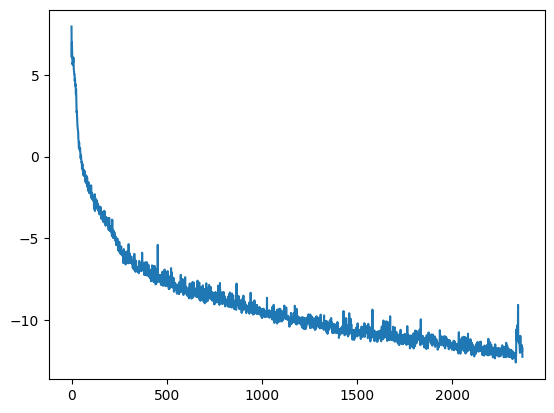

RMSE : [222.97852   57.93777   83.718575  24.455084 100.47362 ] MAE  : [77.93764  35.940037 45.92777   7.217432 24.991045] NLL : 4.675693988800049
[array([88.71811685, 21.64987073, 28.08229106, 16.92683924, 20.59522363]), array([2.72352794, 7.32175747, 4.85859923, 4.0727368 , 4.02795603]), array([27.67837897,  8.61735888, 11.11239529,  3.52809339,  4.84826239]), array([5.67354695, 9.70559955, 6.53921369, 3.97734241, 4.16325975]), array([51.1533261 , 37.19899359, 31.27883638, 52.71814891, 35.51445204]), array([38.33289027,  9.4731478 , 12.94422948,  1.20804381,  2.68106518]), array([38.55459235, 11.62177539, 15.36066649, 10.0206116 , 19.57369845])]
[6. 4. 2. 3. 7. 1. 5.]
Iteration No:  4


/home/dhruv.patel/multiout_tech/round_robin/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 5746 1642]


2023-07-30 23:58:35.342766: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[222029,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[222029,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-30 23:58:36.479983: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[222029,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[222029,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-30 23:

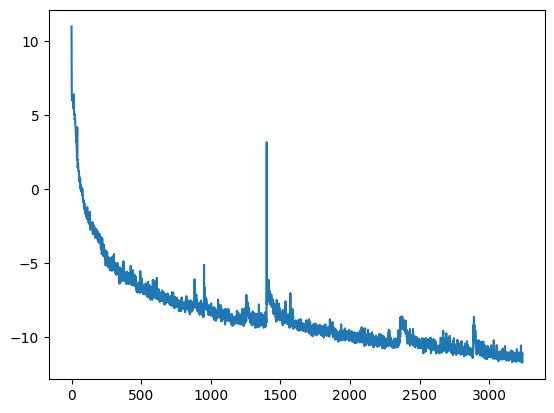

RMSE : [186.25424   54.46631   84.942566  21.831686  78.65022 ] MAE  : [66.61442  32.444893 47.592735  6.121183 17.028362] NLL : 4.811671257019043
[array([57.83698947, 19.80361924, 23.8414014 , 16.50930566, 19.23052541]), array([2.78744476, 8.25647612, 6.52287338, 5.5925394 , 5.06979353]), array([21.10988623,  8.10108324,  8.88044732,  1.22230905,  2.05652243]), array([ 6.2822387 , 10.35563796,  8.04905465,  5.80268439,  5.00012725]), array([34.90994352,  9.77462378, 11.95476785,  1.00552542,  2.26214894]), array([32.87641863, 10.9356078 , 14.1788188 ,  7.27604568, 18.14729087])]
[6. 4. 1. 3. 2. 5.]
Iteration No:  5


/home/dhruv.patel/multiout_tech/round_robin/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 5746 1642 8156]


2023-07-31 00:01:05.576479: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[277982,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[277982,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-31 00:01:06.965039: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[277982,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[277982,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-31 00:

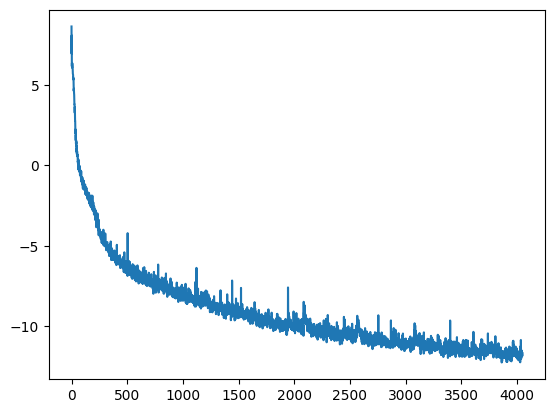

RMSE : [149.81422   51.85726   74.98337   25.900387  64.05261 ] MAE  : [55.67432  29.829325 41.884773  7.284236  9.188787] NLL : 7.573657035827637
[array([2.06079242, 6.98480384, 5.23351169, 5.03939639, 4.6979636 ]), array([12.06717497,  6.92798135,  7.41663361,  1.21239908,  0.85942454]), array([ 4.82004883, 10.44105453,  8.0481993 ,  6.72588939,  6.39495178]), array([18.17698642,  8.37428688,  9.73564053,  2.35657814,  2.88479428]), array([14.26699679,  8.86248728,  9.52281657,  5.55767223,  5.67385336])]
[1. 3. 2. 5. 4.]
Iteration No:  6


/home/dhruv.patel/multiout_tech/round_robin/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 5746 1642 8156 7536]


2023-07-31 00:03:23.688295: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[341138,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[341138,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-31 00:03:25.364838: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[341138,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[341138,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-31 00:

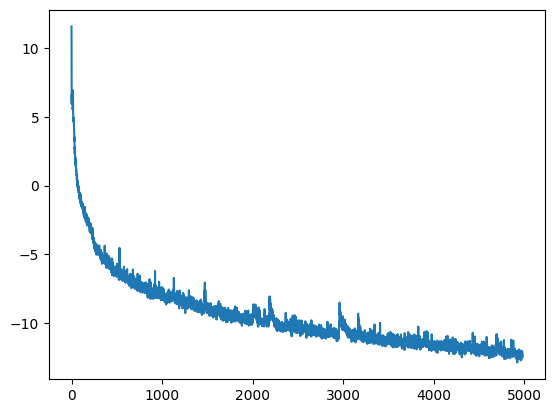

RMSE : [133.50882   52.38299   74.408356  21.211464  69.13274 ] MAE  : [46.775703 29.248466 39.700504  4.872442 11.229857] NLL : 18.65384864807129
[array([1.16509282, 5.42268457, 4.15224378, 2.6179512 , 2.58269978]), array([12.46066659,  6.66804101,  8.73719669,  1.52077091,  2.02103816]), array([3.85263655, 9.67453452, 8.42330833, 4.98641341, 5.75550727]), array([7.71870588, 8.33041618, 9.58736629, 3.89065278, 5.36703953])]
[1. 2. 4. 3.]
Iteration No:  7


/home/dhruv.patel/multiout_tech/round_robin/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 5746 1642 8156 7536  661]


2023-07-31 00:05:35.114048: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[410270,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[410270,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-31 00:05:37.109194: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[410270,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[410270,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-31 00:

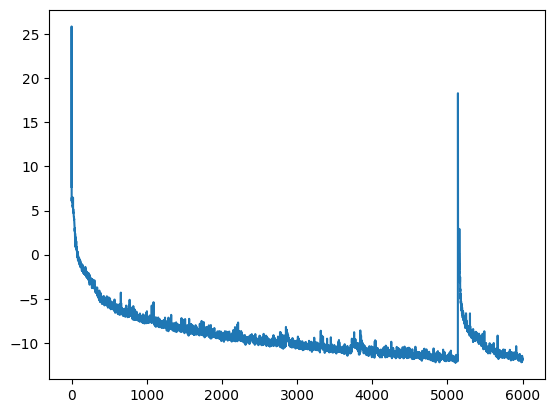

RMSE : [143.43814   53.510395  73.74027   20.924654  59.94286 ] MAE  : [49.882828  31.020218  39.926994   5.4128585 10.225338 ] NLL : 4.500190734863281
[array([1.21044587, 7.19845001, 5.65047585, 5.81999242, 5.42511122]), array([17.49064772,  7.20736913,  9.71197046,  2.16736065,  3.97108779]), array([12.51462015,  8.35741057, 10.26150804,  4.04209134,  7.40496385])]
[1. 2. 3.]
Iteration No:  8


/home/dhruv.patel/multiout_tech/round_robin/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 5746 1642 8156 7536  661 7800]


2023-07-31 00:07:36.354495: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[484714,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[484714,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-31 00:07:38.677751: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[484714,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[484714,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


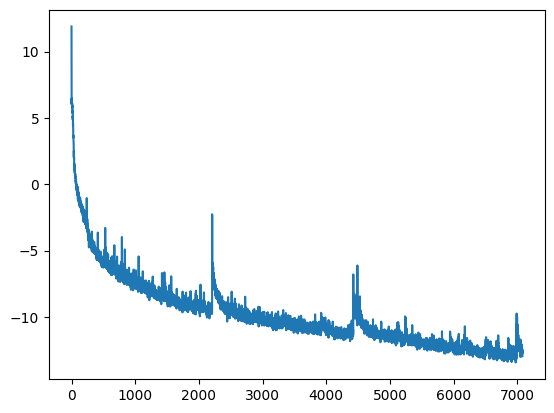

RMSE : [136.01875   50.937923  66.66347   20.511255  62.93874 ] MAE  : [44.163467  27.967373  32.357487   5.4727874 10.958006 ] NLL : 4.80734920501709
[array([0.73315102, 6.1560429 , 4.39986585, 7.9955302 , 7.45092693]), array([20.87886386,  6.04101139, 10.54615086,  1.60778734,  4.54772504])]
[2. 1.]
Iteration No:  9


/home/dhruv.patel/multiout_tech/round_robin/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 5746 1642 8156 7536  661 7800 8386]


2023-07-31 00:09:32.134023: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[566081,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[566081,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-31 00:09:34.786624: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[566081,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[566081,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


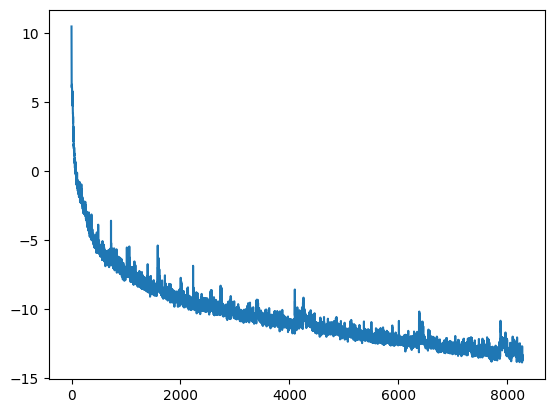

RMSE : [145.32309   50.252346  66.88767   20.163689  58.699856] MAE  : [49.05566   27.44927   31.173326   4.3697925 10.246682 ] NLL : 11.19210147857666
[array([42.07149795,  8.47262852, 21.3073226 ,  0.65285544,  2.31291041])]
[1.]


In [8]:
total_rmse=[]
houseids=[]
for i in range(len(train_list)):
    # print(len(train_list))
    print("Train Set No:", i+1)
    train_houses = train_list[i]
    test_houses = test_list[i]
    pool_houses = pool_list[i]
    #change 1 - removing train test var from function
    train = data_aggregated[data_aggregated["dataid"].isin(train_houses)] 
    test = data_aggregated[data_aggregated["dataid"].isin(test_houses)]

    maes = []
    rmse_iter=[]
    houses=[]
    start= ["2018-03-01 00:00:00-06","2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-26 00:00:00-06", "2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06","2018-04-21 00:00:00-06"]
    end= ["2018-03-10 23:59:00-06","2018-03-15 23:59:00-06","2018-03-20 23:59:00-06","2018-03-25 23:59:00-06","2018-03-31 23:59:00-06","2018-04-05 23:59:00-06", "2018-04-10 23:59:00-06", "2018-04-15 23:59:00-06", "2018-04-20 23:59:00-06", "2018-04-25 23:59:00-06"]
    dates = ["2018-03-01 00:00:00-06","2018-03-06 00:00:00-06", "2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-27 00:00:00-06","2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06"]
    for j in range(len(start)):
        # print(len(start))
        print("Iteration No: ",j)
        if(j==0):
            house, houseid,rmsee, maee, train, test = retrain(0, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated, j%5)
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
        elif(j==10):
            house, houseid,rmsee, maee, train, test= retrain(house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated, j%5)
            rmse_iter.append(rmsee)
            maes.append(maee)
        else:
            house, houseid,rmsee, maee, train, test = retrain(house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated, j%5)
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
    total_rmse.append(rmse_iter)
    houseids.append(houses)


In [9]:
houseids

[[9278, 8565, 5746, 1642, 8156, 7536, 661, 7800, 8386, 9160]]

In [10]:
rmse_iter = np.array(rmse_iter)
rmse_iter

array([[838.97186 ,  65.4115  , 283.74158 ,  52.868984, 462.44693 ],
       [651.47064 ,  63.11932 , 118.34574 , 112.265045, 320.69913 ],
       [313.41553 ,  58.654972,  91.03152 ,  31.602877, 143.7694  ],
       [222.97852 ,  57.93777 ,  83.718575,  24.455084, 100.47362 ],
       [186.25424 ,  54.46631 ,  84.942566,  21.831686,  78.65022 ],
       [149.81422 ,  51.85726 ,  74.98337 ,  25.900387,  64.05261 ],
       [133.50882 ,  52.38299 ,  74.408356,  21.211464,  69.13274 ],
       [143.43814 ,  53.510395,  73.74027 ,  20.924654,  59.94286 ],
       [136.01875 ,  50.937923,  66.66347 ,  20.511255,  62.93874 ],
       [145.32309 ,  50.252346,  66.88767 ,  20.163689,  58.699856]],
      dtype=float32)

In [11]:
maes = np.array(maes) 

In [12]:
appliances = ['air', 'refrigerator' , 'furnace', 'clothewasher', 'dishwasher']
for i in range(5):
    d = pd.DataFrame(rmse_iter[:,i])
    d1 = pd.DataFrame(maes[:,i])
    if not os.path.exists(f'{appliances[i]}'):
        os.mkdir(f'{appliances[i]}')
    # Save the DataFrame to a CSV file
    d.to_csv(os.path.join(f'{appliances[i]}', "new_RMSE.csv"), index=False)
    d1.to_csv(os.path.join(f'{appliances[i]}', "new_MAE.csv"), index=False)
    
house_df= pd.DataFrame(houseids)
house_df.to_csv("new_houseids.csv")


In [13]:
d = pd.DataFrame(rmse_iter)
d.to_csv("new_errors.csv")

In [14]:
house_df= pd.DataFrame(houseids)
house_df.to_csv("new_houseids.csv")

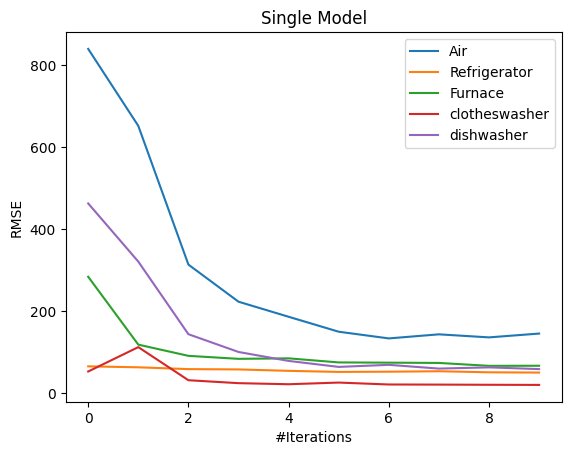

In [15]:
for i in range(5):
    plt.plot(d[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(['Air', 'Refrigerator', 'Furnace', 'clotheswasher', 'dishwasher'])



In [16]:
import numpy as np
import matplotlib.pyplot as plt
scaled_total_rmse =[]
for i in range(5):
    a = np.array(d[i])
    ans = (a-a.min())/(a.max()-a.min())
    scaled_total_rmse.append(ans)

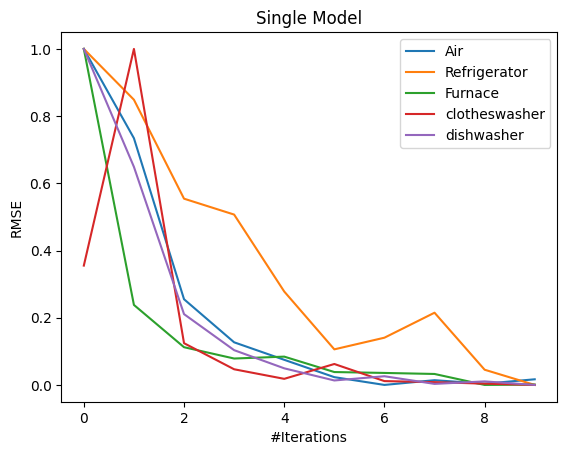

In [17]:
for i in range(5):
    plt.plot(scaled_total_rmse[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(['Air', 'Refrigerator', 'Furnace', 'clotheswasher', 'dishwasher'])

In [18]:
maes_df = pd.DataFrame(maes)


In [19]:
maes_df

,0,1,2,3,4
0,328.138306,41.170593,121.629692,22.690022,248.003448
1,259.634979,40.192894,62.075867,44.703426,154.190857
2,117.998161,35.993095,49.520485,10.611089,54.066265
3,77.937637,35.940037,45.927769,7.217432,24.991045
4,66.614418,32.444893,47.592735,6.121183,17.028362
5,55.674320,29.829325,41.884773,7.284236,9.188787
6,46.775703,29.248466,39.700504,4.872442,11.229857
7,49.882828,31.020218,39.926994,5.412858,10.225338
8,44.163467,27.967373,32.357487,5.472787,10.958006
9,49.055660,27.449270,31.173326,4.369792,10.246682


In [20]:
print(data_aggregated['air1'].mean()*1000, data_aggregated['refrigerator1'].mean()*1000, data_aggregated['furnace1'].mean()*1000, data_aggregated['clotheswasher1'].mean()*1000, data_aggregated['dishwasher1'].mean()*1000)

387.9863080087092 145.74786692064612 179.39920680753877 26.982003007108773 16.52270251359823


In [21]:
rank_array

NameError: name 'rank_array' is not defined

In [ ]:
d = pd.DataFrame(rank_array)
d.to_csv('ranks.csv')

In [ ]:
d